In [73]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

['pred_ranks_for_true_topk_epoch', 'true_ranks_for_pred_topk_epoch']
['pred_ranks_for_true_topk_epoch', 'true_ranks_for_pred_topk_epoch']
['pred_ranks_for_true_topk_epoch', 'true_ranks_for_pred_topk_epoch']
['pred_ranks_for_true_topk_epoch', 'true_ranks_for_pred_topk_epoch']
['pred_ranks_for_true_topk_epoch', 'true_ranks_for_pred_topk_epoch']
['pred_ranks_for_true_topk_epoch', 'true_ranks_for_pred_topk_epoch']


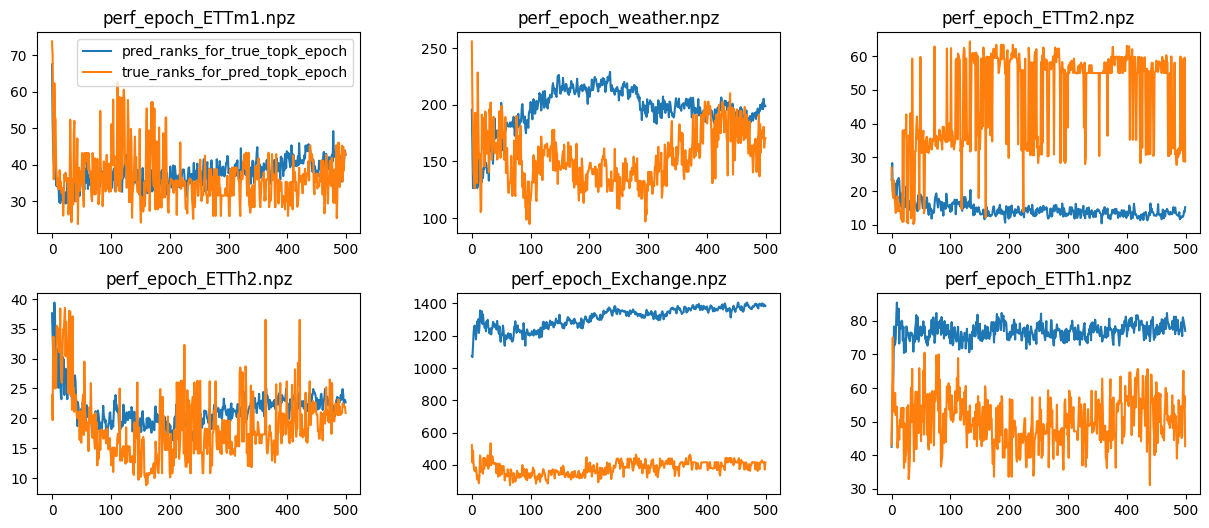

In [67]:
result_path = '/data/coding/chaochuan/TSGym/meta/results'

file_list = os.listdir(result_path)
fig = plt.figure(figsize=(15, 6))
for i, file in enumerate(file_list):
    perf_epoch = np.load(os.path.join(result_path, file), allow_pickle=True)
    print(perf_epoch.files)

    fig.add_subplot(2, 3, i+1)
    for _ in perf_epoch.files:
        plt.plot(perf_epoch[_], label=_)

    if i==0: plt.legend()
    plt.title(file)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

meta-feature的差异性

In [68]:
meta_feature_path = '/data/coding/chaochuan/TSGym/meta_learner_cc/meta_feature_copy/meta_feature'

In [69]:
meta_features_dict = {}
for file in os.listdir(meta_feature_path):
    meta_feature = np.load(os.path.join(meta_feature_path, file), allow_pickle=True)
    meta_features_dict[file.replace('.npz', '').replace('meta_feature_', '')] = meta_feature['meta_feature']

In [70]:
meta_features = np.stack(list(meta_features_dict.values()))
meta_features = np.clip(meta_features, -1e4, 1e4)

# z-score
mu = np.nanmean(meta_features, axis=0, keepdims=True)
std = np.nanstd(meta_features, axis=0, keepdims=True)

meta_features = (meta_features - mu) / (std + 1e-6)
meta_features = np.nan_to_num(meta_features, nan=0.0)

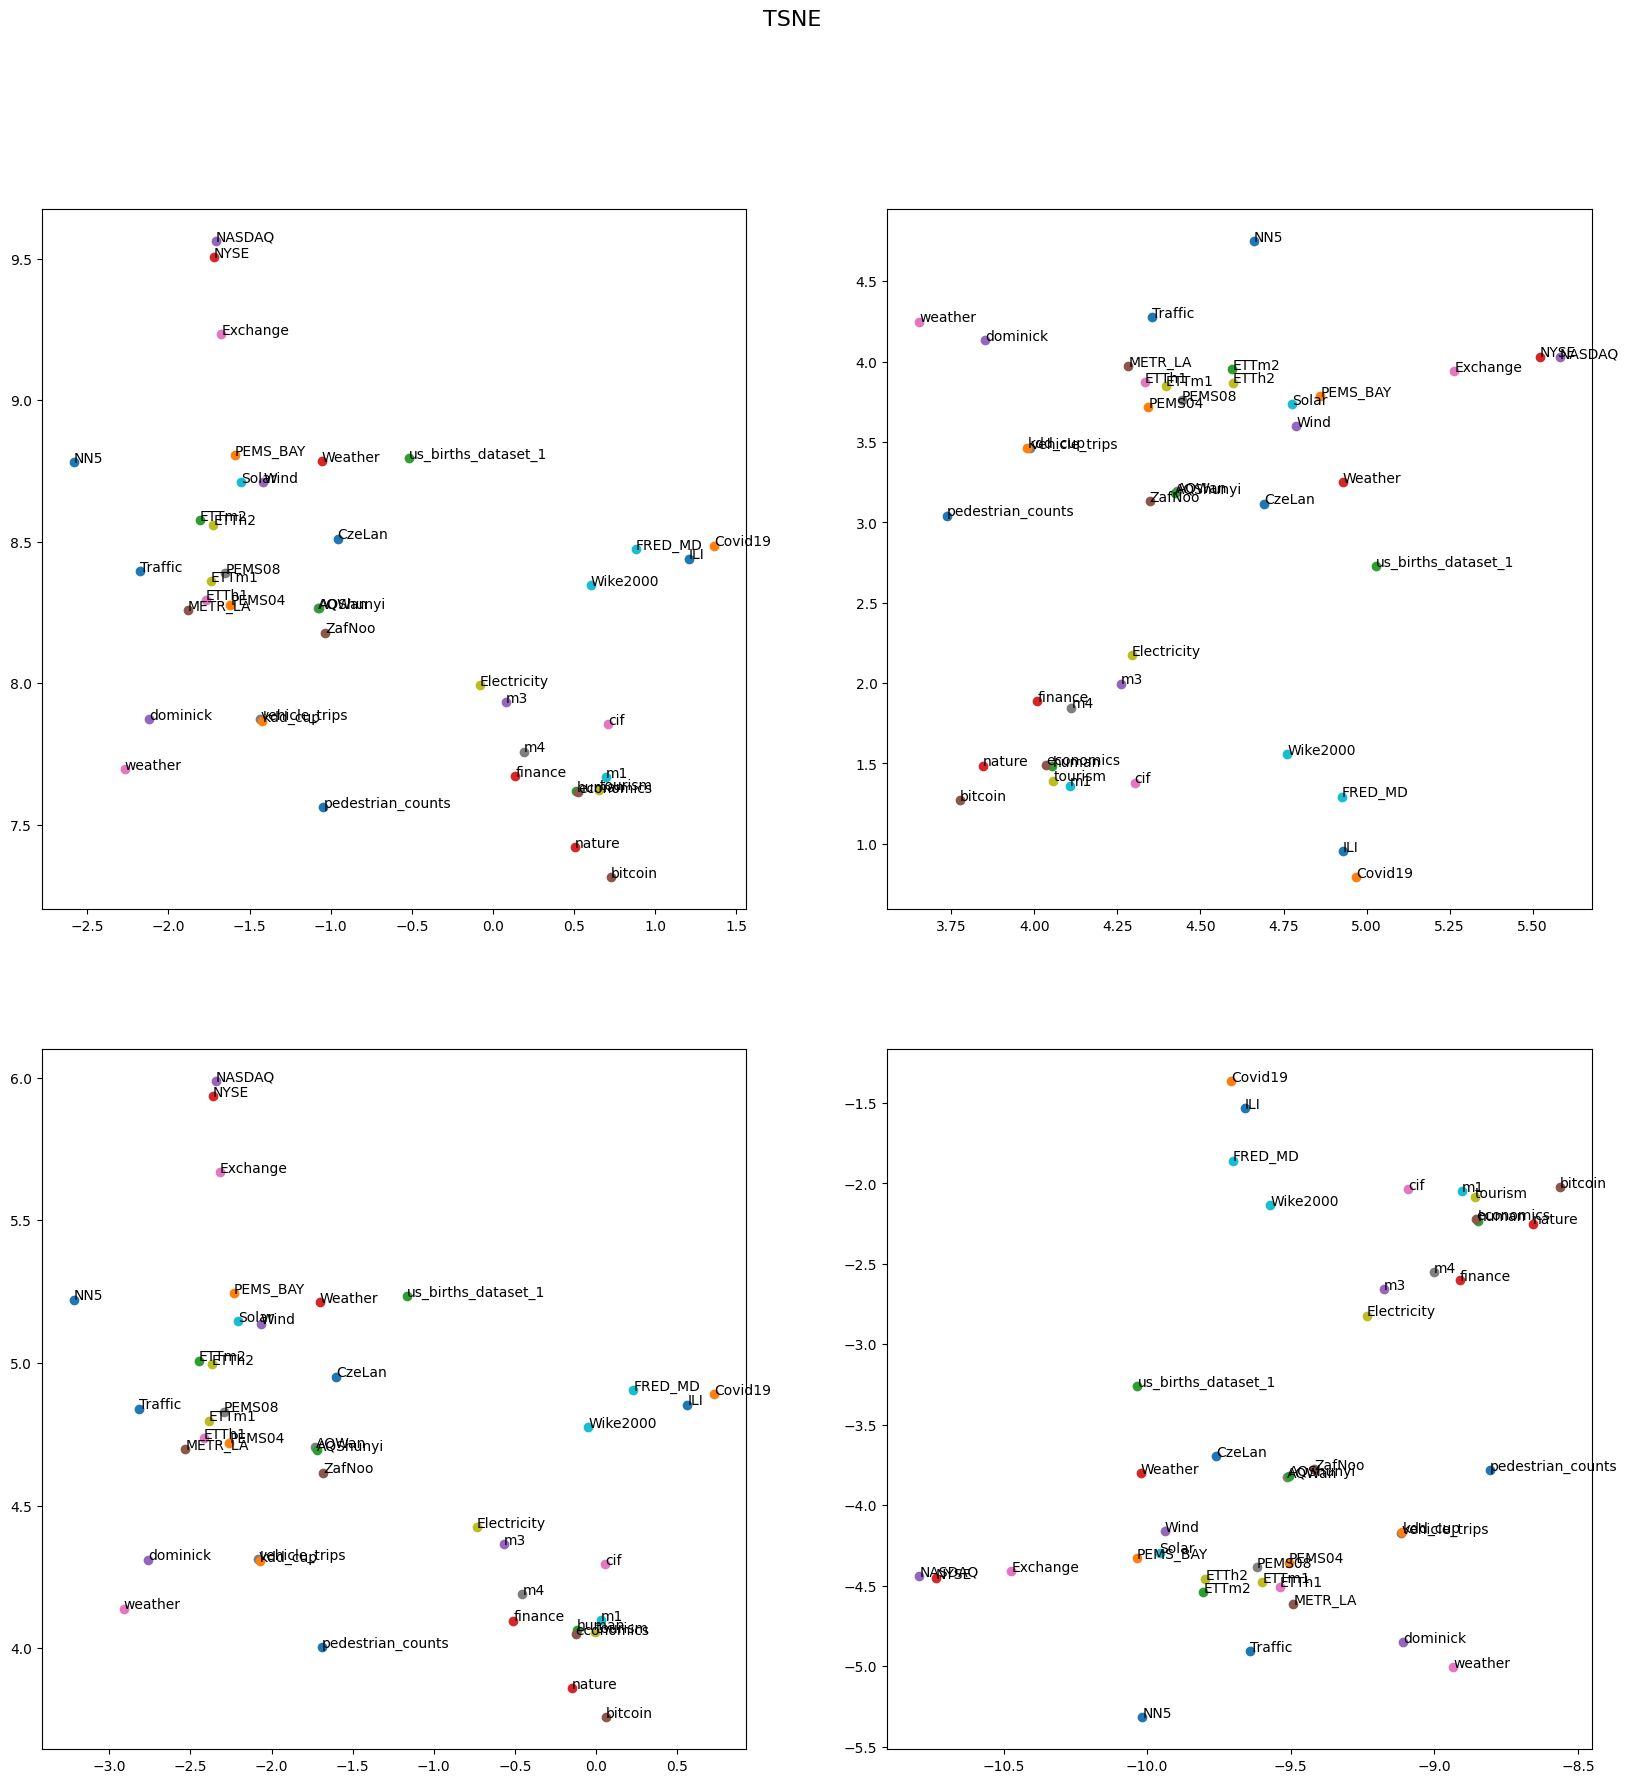

In [78]:
fig = plt.figure(figsize=(20, 20))

for seed in range(1, 5):
    tsne = TSNE(n_components=2, random_state=seed)
    meta_features_tsne = tsne.fit_transform(meta_features) 
    meta_features_dict_tsne = {k: v for k, v in zip(meta_features_dict.keys(), meta_features_tsne)}
    fig.add_subplot(2, 2, seed)
    for k, v in meta_features_dict_tsne.items():
        plt.scatter(v[0], v[1])
        plt.text(v[0], v[1], k)
fig.suptitle('TSNE', fontsize=16)
plt.show()


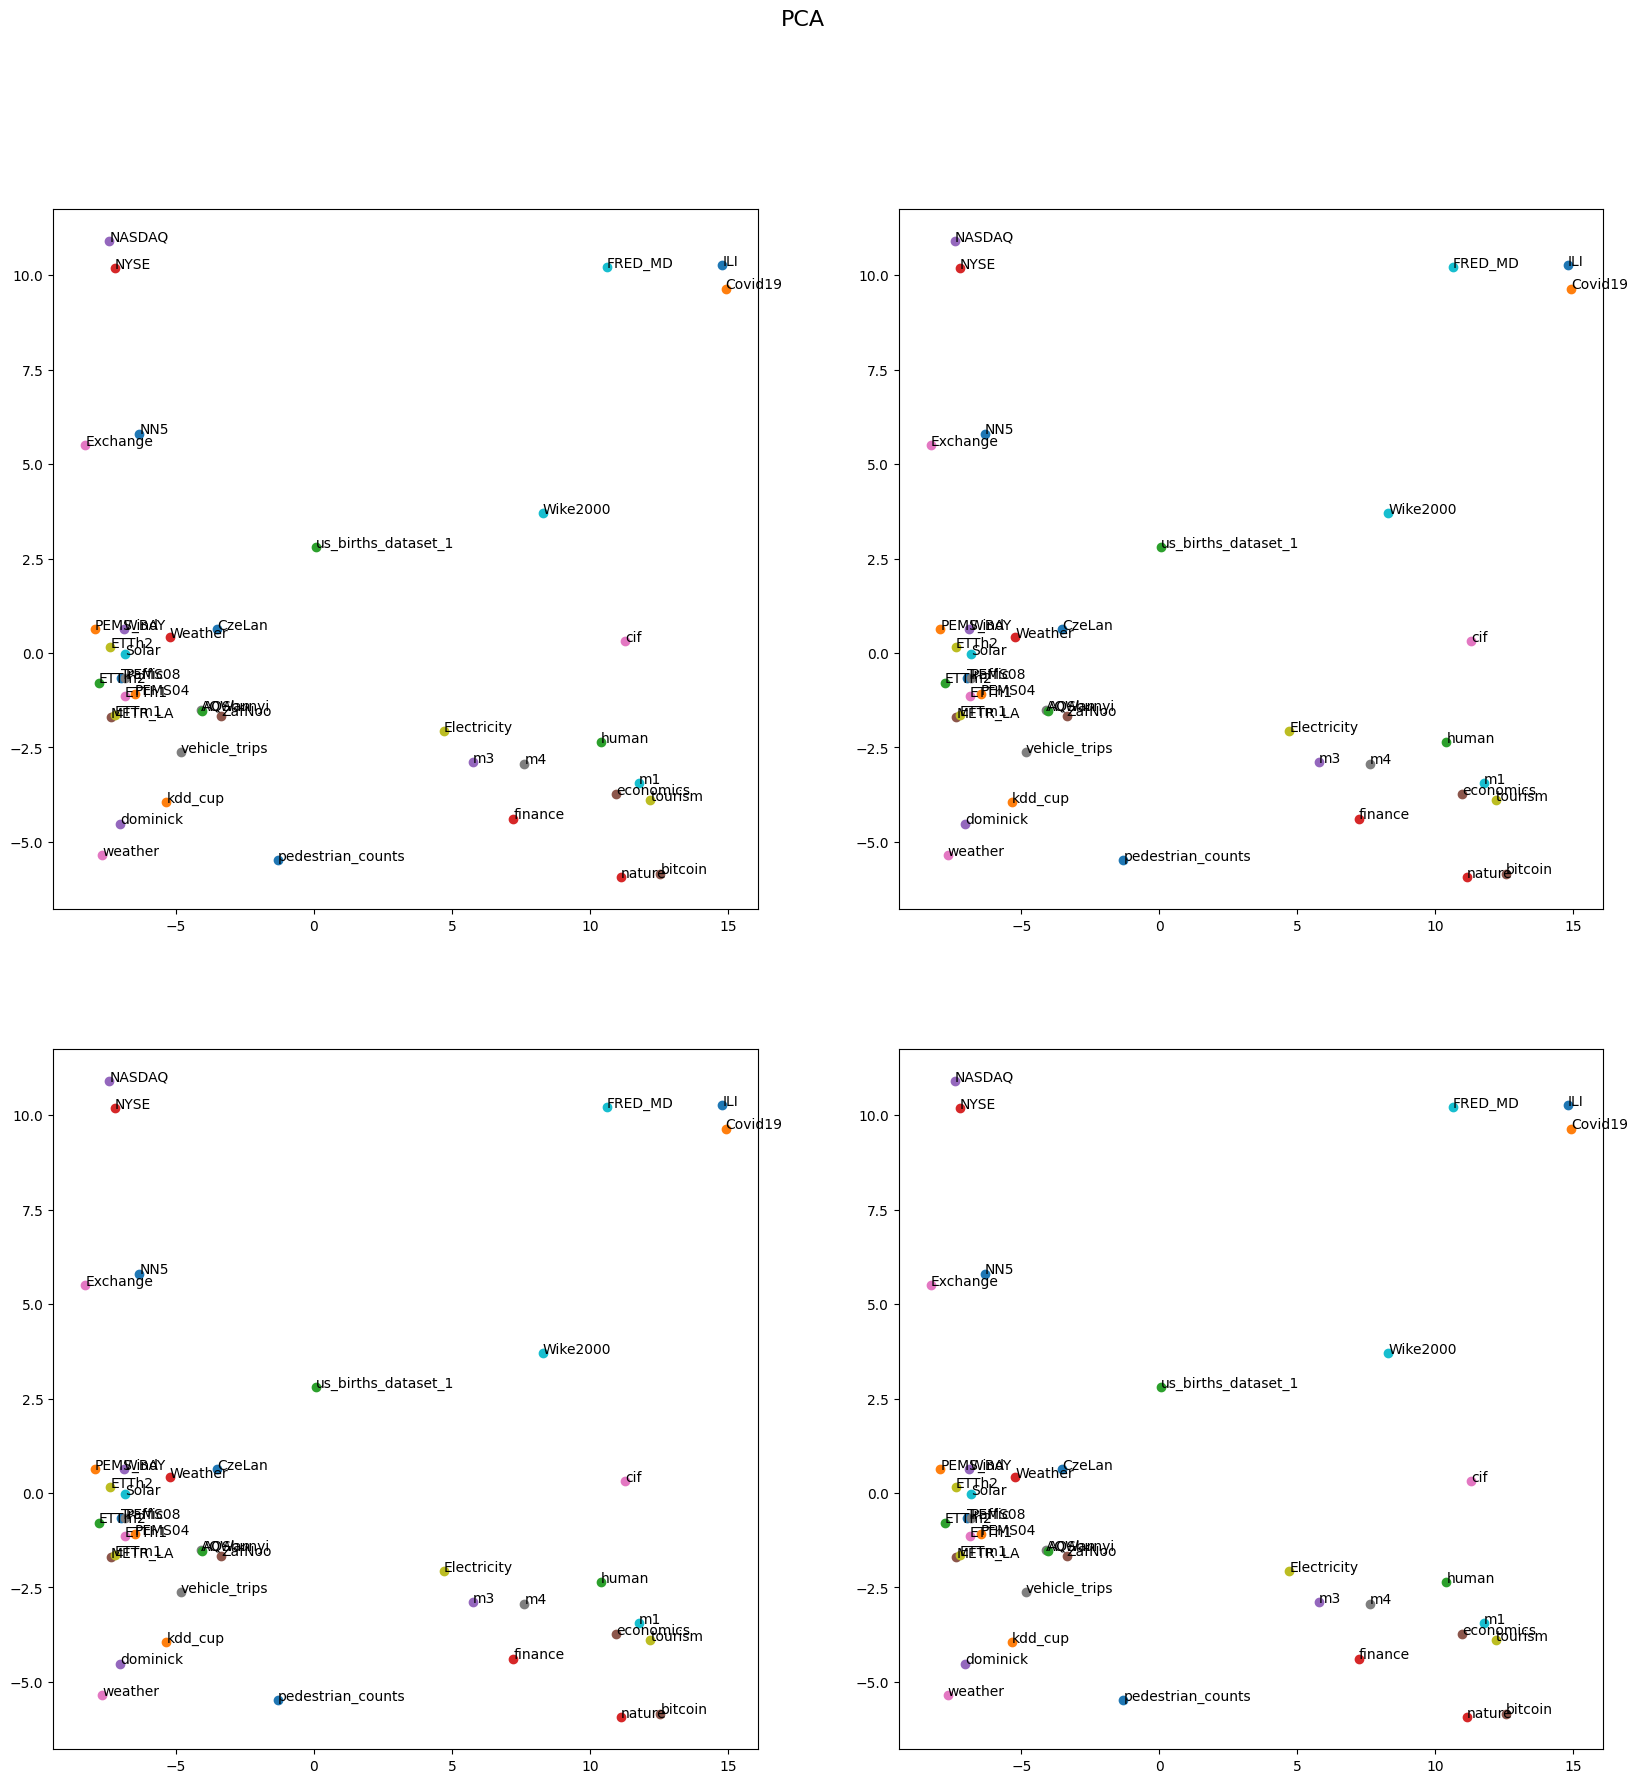

In [77]:
fig = plt.figure(figsize=(20, 20))

for seed in range(1, 5):
    pca = PCA(n_components=2, random_state=seed)
    meta_features_pca = pca.fit_transform(meta_features) 
    meta_features_dict_pca = {k: v for k, v in zip(meta_features_dict.keys(), meta_features_pca)}
    fig.add_subplot(2, 2, seed)
    for k, v in meta_features_dict_pca.items():
        plt.scatter(v[0], v[1])
        plt.text(v[0], v[1], k)
fig.suptitle('PCA', fontsize=16)
plt.show()
